In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from PIL import Image
%matplotlib inline

In [3]:
data_dir = "../../CS5661/HW2/"
label_file = data_dir + "label.csv"
df = pd.read_csv(label_file)



In [16]:
import os.path
#print(label_df['name of the file'])
feature_data = []
i_dir = data_dir + "Digit/"

for i in range(len(df)):
    filename = df.loc[i,'name of the file']
    filepath = i_dir + str(filename) + ".jpg"
    if(os.path.isfile(filepath)):
        #print(filepath)
        img = Image.open(filepath)
        feature = (np.asarray(img.getdata())).tolist()
        if(i==1):
            print(feature)
        feature_data.append(feature)
        
df['feature'] =  feature_data  
        

[0, 0, 11, 187, 210, 78, 5, 0, 13, 5, 0, 181, 252, 136, 0, 2, 0, 1, 56, 232, 255, 104, 5, 3, 0, 118, 244, 240, 255, 11, 8, 0, 18, 0, 11, 255, 242, 57, 12, 0, 0, 3, 12, 248, 255, 77, 5, 0, 9, 2, 21, 255, 255, 114, 0, 0, 0, 0, 0, 172, 251, 157, 0, 12]


In [5]:
#Dataframe
X = df[['feature']]
y = df['digit']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=2)



In [6]:
Xdata = []
ydata = []
for index, row in X.iterrows():
    Xdata.append(row['feature'])
    
for index, item in y.iteritems():
    ydata.append(item)

Xtrain = []
for index, row in X_train.iterrows():
    #print(index)
    Xtrain.append(row['feature'])
Xtest = []
ytrain = []
ytest = []

for index, row in X_test.iterrows():
    #print(index)
    Xtest.append(row['feature'])

for index, item in y_train.iteritems():
    #print(index, item)
    ytrain.append(item)

for index, item in y_test.iteritems():
    #print(index, item)
    ytest.append(item)
print(X_test[0:10])
print(y_test.index[0:10])


                                                feature
154   [0, 0, 6, 49, 255, 45, 0, 5, 4, 2, 0, 159, 239...
564   [0, 14, 8, 251, 167, 5, 16, 0, 15, 0, 153, 181...
1444  [1, 3, 127, 209, 229, 63, 2, 7, 0, 87, 205, 51...
1394  [0, 2, 31, 255, 200, 10, 0, 0, 12, 0, 62, 246,...
1660  [3, 0, 167, 122, 0, 19, 0, 6, 0, 77, 250, 54, ...
1368  [0, 18, 192, 255, 255, 232, 2, 0, 1, 109, 212,...
1436  [0, 6, 0, 0, 179, 232, 32, 0, 14, 0, 7, 117, 2...
1420  [5, 10, 196, 182, 192, 231, 95, 0, 0, 0, 228, ...
1334  [5, 0, 12, 216, 178, 13, 0, 0, 1, 6, 0, 184, 2...
581   [4, 0, 13, 158, 250, 102, 0, 10, 0, 0, 163, 24...
Int64Index([154, 564, 1444, 1394, 1660, 1368, 1436, 1420, 1334, 581], dtype='int64')


In [7]:
my_ANN = MLPClassifier(hidden_layer_sizes=(80,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)
my_ANN.fit(Xtrain, ytrain)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80,), learning_rate='constant',
       learning_rate_init=0.002, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [8]:
#print(my_ANN.coefs_)
#print(my_ANN.intercepts_)

In [9]:
y_predict_ann = my_ANN.predict(Xtest)

print(ytest)
print(y_predict_ann.tolist())

[4, 0, 9, 1, 4, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 4, 6, 2, 7, 4, 6, 4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7, 9, 6, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 4, 4, 7, 3, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4, 6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9, 4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 9, 1, 0, 3, 4, 3, 0, 9, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8, 2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0, 4, 0, 0, 4]
[4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 8, 6, 2, 7, 4, 6, 4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 1, 5, 7, 9, 6, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 8, 7, 8, 7, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4, 6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 1, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9, 4, 7, 0, 3, 5, 1, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 5, 1, 0, 3, 4, 3, 0, 8, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4,

In [10]:
score_ann = accuracy_score(ytest, y_predict_ann)
print(score_ann)

0.916666666667


In [11]:
from sklearn import metrics

cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)

print("Confusion matrix:")
print(cm_ANN)

Confusion matrix:
[[13  0  0  0  1  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  1  0]
 [ 0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  1  0  0]
 [ 0  0  0  0 16  0  0  1  3  1]
 [ 0  0  0  0  0 16  0  0  0  0]
 [ 0  1  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 17  1  0]
 [ 0  2  0  0  0  0  0  0 16  1]
 [ 0  0  0  0  0  1  0  0  1 14]]


../../CS5661/HW2/Digit/1660.jpg
label 4 predict 8
../../CS5661/HW2/Digit/1611.jpg
label 4 predict 8
../../CS5661/HW2/Digit/123.jpg
label 8 predict 1
../../CS5661/HW2/Digit/1628.jpg
label 4 predict 8
../../CS5661/HW2/Digit/757.jpg
label 4 predict 7
../../CS5661/HW2/Digit/1552.jpg
label 7 predict 8
../../CS5661/HW2/Digit/1605.jpg
label 3 predict 7
../../CS5661/HW2/Digit/1551.jpg
label 6 predict 1
../../CS5661/HW2/Digit/794.jpg
label 8 predict 1
../../CS5661/HW2/Digit/37.jpg
label 9 predict 5
../../CS5661/HW2/Digit/69.jpg
label 9 predict 8
../../CS5661/HW2/Digit/736.jpg
label 1 predict 8
../../CS5661/HW2/Digit/1468.jpg
label 8 predict 9
../../CS5661/HW2/Digit/1573.jpg
label 0 predict 4
../../CS5661/HW2/Digit/1095.jpg
label 4 predict 9


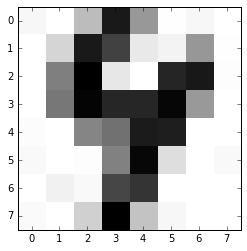

In [12]:
mislabeled = []
for n in range(len(y_predict_ann)):
    if( y_predict_ann[n] != ytest[n]):
        #print("wrong prediction, index =", y_test.index[n])
        
        image_file = data_dir + "Digit/" + str(y_test.index[n]) + ".jpg"
        print(image_file)
        
        img = mpimg.imread(image_file)
        plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
        print("label", ytest[n], "predict", y_predict_ann[n])


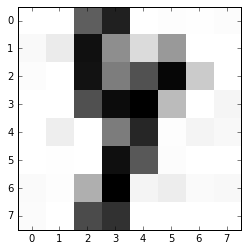

In [13]:
file = "../../CS5661/HW2/Digit/1611.jpg"
img = mpimg.imread(file)
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')

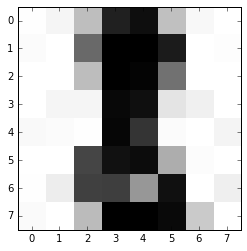

In [14]:
file = "../../CS5661/HW2/Digit/123.jpg"
img = mpimg.imread(file)
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')

In [18]:
from sklearn.model_selection import GridSearchCV
neuron_number = [(i,) for i in range(50,200)]

param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                           learning_rate_init = 0.002)

grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')
grid.fit(Xdata, ydata)
print("Best score", grid.best_score_)
print("Best param", grid.best_params_)

{'hidden_layer_sizes': [(50,), (51,), (52,), (53,), (54,), (55,), (56,), (57,), (58,), (59,), (60,), (61,), (62,), (63,), (64,), (65,), (66,), (67,), (68,), (69,), (70,), (71,), (72,), (73,), (74,), (75,), (76,), (77,), (78,), (79,), (80,), (81,), (82,), (83,), (84,), (85,), (86,), (87,), (88,), (89,), (90,), (91,), (92,), (93,), (94,), (95,), (96,), (97,), (98,), (99,), (100,), (101,), (102,), (103,), (104,), (105,), (106,), (107,), (108,), (109,), (110,), (111,), (112,), (113,), (114,), (115,), (116,), (117,), (118,), (119,), (120,), (121,), (122,), (123,), (124,), (125,), (126,), (127,), (128,), (129,), (130,), (131,), (132,), (133,), (134,), (135,), (136,), (137,), (138,), (139,), (140,), (141,), (142,), (143,), (144,), (145,), (146,), (147,), (148,), (149,), (150,), (151,), (152,), (153,), (154,), (155,), (156,), (157,), (158,), (159,), (160,), (161,), (162,), (163,), (164,), (165,), (166,), (167,), (168,), (169,), (170,), (171,), (172,), (173,), (174,), (175,), (176,), (177,), (1